In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD CAD/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

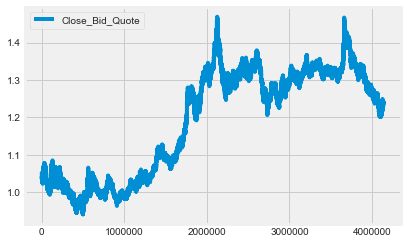

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:02:00          1.05170
1        2010-01-03 17:04:00          1.05180
2        2010-01-03 17:08:00          1.05170
3        2010-01-03 17:09:00          1.05150
4        2010-01-03 17:14:00          1.05050
...                      ...              ...
4138046  2021-06-30 23:54:00          1.23983
4138047  2021-06-30 23:55:00          1.23984
4138048  2021-06-30 23:56:00          1.23968
4138049  2021-06-30 23:57:00          1.23959
4138050  2021-06-30 23:58:00          1.23965

[4138051 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 17:02:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("D").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

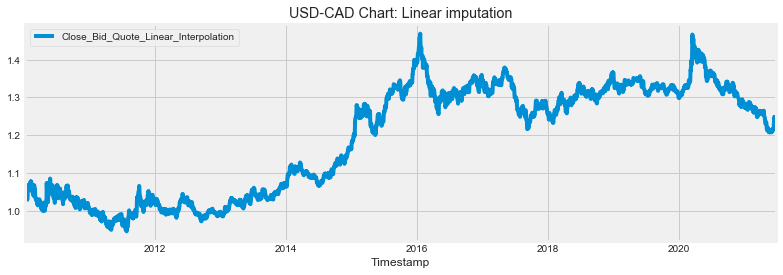

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-CAD Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03,1.0518
2010-01-04,1.0487
2010-01-05,1.0409
2010-01-06,1.0406
2010-01-07,1.0371


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

840

In [16]:
len(train)

3357

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3358

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.20355554],
       [0.19763601],
       [0.1827417 ],
       ...,
       [0.55301801],
       [0.56348221],
       [0.5671676 ]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.20355554, 0.19763601, 0.1827417 , 0.18216884, 0.1754855 ,
       0.17663121, 0.17013882, 0.16364643, 0.17281216, 0.1831236 ,
       0.18255075, 0.16555596, 0.16402834, 0.16402834, 0.16402834,
       0.16040024, 0.17300311, 0.19763601, 0.2045103 , 0.2190227 ,
       0.21720865, 0.2153946 , 0.22131414, 0.23620844, 0.23563559,
       0.23697225, 0.23869083, 0.23907273, 0.23945464, 0.24174607,
       0.22456033, 0.22532414, 0.24804751, 0.25320323, 0.24842941,
       0.2436556 , 0.25224847, 0.24842941, 0.23926369, 0.22055033,
       0.21482175, 0.20899769, 0.20317363, 0.20584697, 0.19534457,
       0.19744505, 0.20298268, 0.20546507, 0.19295767, 0.18045027,
       0.18827933, 0.21482175, 0.21749508, 0.23372606, 0.22112318,
       0.21482175, 0.20852031, 0.21367603, 0.18827933, 0.17319407])]
[0.16899310660887168]

[array([0.20355554, 0.19763601, 0.1827417 , 0.18216884, 0.1754855 ,
       0.17663121, 0.17013882, 0.16364643, 0.17281216, 0.1831236 ,
       0.18255075, 0.16555596, 0.16

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
104/104 [==============================] - 15s 84ms/step - loss: 0.0272
Epoch 2/10
104/104 [==============================] - 9s 85ms/step - loss: 4.5890e-04
Epoch 3/10
104/104 [==============================] - 9s 90ms/step - loss: 4.3254e-04
Epoch 4/10
104/104 [==============================] - 10s 94ms/step - loss: 4.1556e-04
Epoch 5/10
104/104 [==============================] - 10s 98ms/step - loss: 4.0771e-04 1s -
Epoch 6/10
104/104 [==============================] - 9s 88ms/step - loss: 3.7574e-04
Epoch 7/10
104/104 [==============================] - 10s 93ms/step - loss: 4.0334e-04 
Epoch 8/10
104/104 [==============================] - 9s 91ms/step - loss: 4.0154e-04
Epoch 9/10
104/104 [==============================] - 9s 89ms/step - loss: 3.5145e-04: 1s
Epoch 10/10
104/104 [==============================] - 9s 89ms/step - loss: 2.9367e-04


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.014022599444743081

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


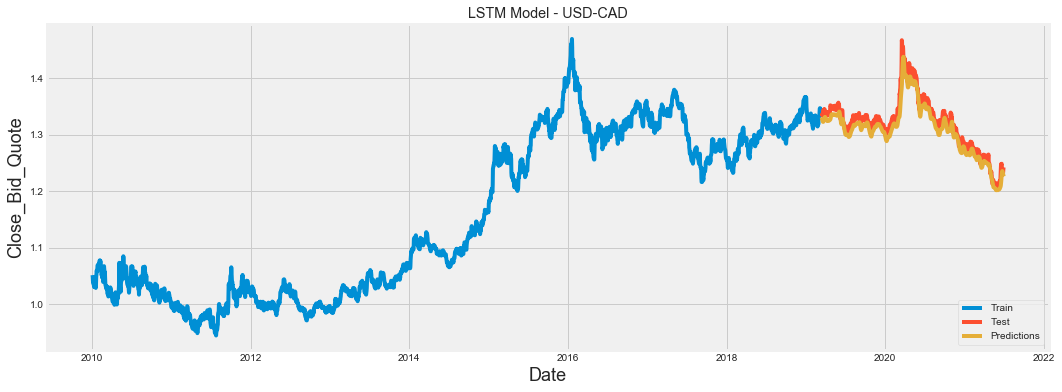

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-CAD')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-15,1.337000,1.330618
2019-03-16,1.335820,1.328903
2019-03-17,1.334640,1.327191
2019-03-18,1.336480,1.325545
2019-03-19,1.333950,1.324326
...,...,...
2021-06-26,1.231465,1.232993
2021-06-27,1.231290,1.230755
2021-06-28,1.234810,1.228463
